# Univariate lineare Regression

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

**1) Erstellen Sie zuerst zum Testen Ihrer Lösung automatische Daten: D.h. Punkte die auf einer Geraden liegen und deren y-Werte mittels eines gaussverteilten "Rauschen" von idealen Werten abweichen**

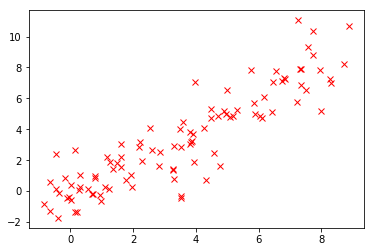

In [9]:
# Anzahl der Beobachtungen
m = 100

# Erzeugen der Beobachtungen
y_unverauscht = np.random.random((m,)) - 1
x = 10 * np.random.random((m,)) - 1
rauschen = np.random.randn((m)) * 1.5
y = x + rauschen

# Visualisierung
mp.plot(x, y, "xr")

#print(type(rauschen))

**2) Implementieren Sie die Hypothese - lineares Modell als Python Funktion**

In [10]:
def linear_hypothesis(theta_0, theta_1):
    return lambda x: theta_0 + theta_1 * x

**3) Implementieren Sie die Kostenfunktion J als Python Funktion**

In [11]:
# J(theta) = 1/2m (SUM(htheta(xi))-yi)^2
def sq_err_cost(hypothesis, x, y):
    # Anzahl der Beobachtungen
    m = float(len(x))
    
    def f(theta_0, theta_1):
        h = hypothesis(theta_0, theta_1)
        return 1./2*m * ((h(x)-y)**2).sum()
    
    return f 

j = sq_err_cost(linear_hypothesis, x, y)

**4) Plotten Sie die Kostenfunktion in der Umgebung des Minimums als Contourplot. Verwenden Sie hierzu plt.contour(X,Y,Z) und zum Erzeugen des X-Y-Oberflaechengitters meshgrid(..)**

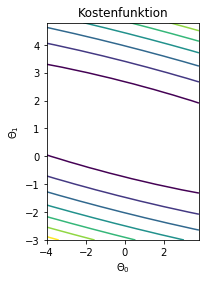

In [12]:
a = 0
b = 1
ran = 4
t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)
C = np.zeros([len(t0), len(t1)])

for i, theta0 in enumerate(t0):
    for k, theta1 in enumerate(t1):
        C[k][i] = j(theta0, theta1)

T0, T1 = np.meshgrid(t0, t1)

plt.subplot(121)
plt.contour(T0, T1, C)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('Kostenfunktion')

**5) Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.**

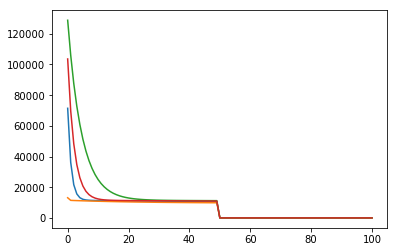

In [31]:
def compute_new_theta(x, y, theta_0, theta_1, alpha):
    m = float(len(x))
    tmp0 = theta_0 - alpha * (1 / m * (theta_0 + theta_1 * x - y)).sum()
    tmp1 = theta_1 - alpha * (1 / m * (theta_0 + theta_1 * x - y)*x).sum()
    
    return (tmp0, tmp1)

alpha = [0.0175, 0.054, 0.005, 0.01]
iterations = 100
costs = np.zeros([len(alpha), iterations + 1])
for a in range(len(alpha)):
    theta_0 = 1
    theta_1 = 2
    for i in range(0,50):
        theta_0, theta_1 = compute_new_theta(x, y, theta_0, theta_1, alpha[a])
        costs[a][i] = j(theta_0, theta_1)
    mp.plot(costs[a])
#mp.plot(costs[2])